In [1]:
import re
import numpy as np
import pandas as pd
from pylab import rcParams
import statsmodels.api as sm


from scraping_functions import *
from cleaning_functions import *

In [2]:
usd = businessinsider_usd_history('20130428')

In [3]:
usd = asset_ts_clean(usd, format="%m/%d/%Y")

In [4]:
usd

,Closing Price,Open,Daily High,Daily Low
Date,,,,
2013-04-29,82.14,82.39,82.45,82.04
2013-04-30,81.73,82.13,82.27,81.60
2013-05-01,81.65,81.70,81.74,81.33
2013-05-02,82.20,81.62,82.35,81.51
2013-05-03,82.10,82.21,82.52,81.91
...,...,...,...,...
2020-04-28,99.96,100.06,100.21,99.45
2020-04-29,99.50,99.88,99.89,99.47
2020-04-30,99.04,99.48,99.73,98.81


In [19]:
df

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2020-05-02,214.230000,215.850000,212.880000,215.330000,18260876092,2.385083e+10
2020-05-01,207.900000,217.630000,207.780000,214.220000,20816320834,2.372537e+10
2020-04-30,216.910000,227.530000,206.440000,207.600000,28089191904,2.298965e+10
2020-04-29,198.470000,218.450000,198.120000,216.970000,26397548759,2.402389e+10
2020-04-28,197.270000,198.790000,194.850000,198.420000,18217507467,2.196689e+10
...,...,...,...,...,...,...
2015-08-11,0.708087,1.130000,0.663235,1.070000,1463100,4.279650e+07
2015-08-10,0.713989,0.729854,0.636546,0.708448,405283,4.313000e+07
2015-08-09,0.706136,0.879810,0.629191,0.701897,532170,4.263760e+07


In [7]:
usd.to_pickle("usd.pickle")

In [6]:
df = pd.read_csv("data/coinmarketcap-all/bitcoin_price.csv")
df1 = pd.read_csv("data/bitcoin_20180221-20200506.csv")
df = asset_ts_clean(df)
df1 = asset_ts_clean(df1)
btc = pd.concat([df,df1])

df = pd.read_csv("data/coinmarketcap-all/ethereum_price.csv")
df1 = pd.read_csv("data/ethereum_20180221-20200506.csv")
df = asset_ts_clean(df)
df1 = asset_ts_clean(df1)
eth = pd.concat([df,df1])

In [7]:
eth

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2015-08-07,2.830000,3.540000,2.520000,2.770000,164329,NaN
2015-08-08,2.790000,2.800000,0.714725,0.753325,674188,1.679110e+08
2015-08-09,0.706136,0.879810,0.629191,0.701897,532170,4.263760e+07
2015-08-10,0.713989,0.729854,0.636546,0.708448,405283,4.313000e+07
2015-08-11,0.708087,1.130000,0.663235,1.070000,1463100,4.279650e+07
...,...,...,...,...,...,...
2020-05-01,207.900000,217.630000,207.780000,214.220000,20816320834,2.372537e+10
2020-05-02,214.230000,215.850000,212.880000,215.330000,18260876092,2.385083e+10
2020-05-03,215.350000,219.270000,208.690000,210.930000,20469034664,2.336718e+10


In [8]:
eth.to_pickle("ethereum.pickle")
btc.to_pickle("bitcoin.pickle")

In [2]:
df = pd.read_csv("data/coinmarketcap-all/bitcoin_price.csv")

In [49]:
df["2013-12"]

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2013-12-31,760.32,760.58,738.17,754.01,20897300.0,9268240000
2013-12-30,741.35,766.60,740.24,756.13,20707700.0,9037000000
2013-12-29,728.05,748.61,714.44,745.05,19011300.0,8872600000
2013-12-28,737.98,747.06,705.35,727.83,32505800.0,8990850000
2013-12-27,763.28,777.51,713.60,735.07,46862700.0,9295570000
2013-12-26,683.94,777.75,683.94,761.98,NaN,8326270000
2013-12-25,666.31,682.70,649.48,682.21,NaN,8108930000
2013-12-24,672.36,684.39,645.71,665.58,NaN,8179730000
2013-12-23,613.06,680.91,611.04,673.41,NaN,7455670000


In [2]:
btc_hist = coinmarketcap_history("bitcoin", "20180221", directory="data")
wait_cycle(4,7)
eth_hist = coinmarketcap_history("ethereum", "20180221", directory="data")
wait_cycle(4,7)

In [16]:
ltc_hist = coinmarketcap_history("litecoin", "20180221", directory="data")
wait_cycle(4,7)
xrp_hist = coinmarketcap_history("xrp", "20180221", directory="data")
wait_cycle(4,7)
bch_hist = coinmarketcap_history("bitcoin-cash", "20180221", directory="data")

In [ ]:
tether

In [19]:
xtz_hist = coinmarketcap_history("tezos", "20180630", directory="data")
wait_cycle(4,7)
bnb_hist = coinmarketcap_history("binance-coin", "20170725", "20180221", directory="data")
wait_cycle(4,7)
bnb_hist2 = coinmarketcap_history("binance-coin", "20180221", directory="data")
wait_cycle(4,7)
eos_hist = coinmarketcap_history("eos", "20170702" "20180221", directory="data")
wait_cycle(4,7)
eos_hist2 = coinmarketcap_history("eos", "20180221", directory="data")

In [3]:
df1 = pd.read_csv("data/bitcoin_20180221-20200503.csv")

In [3]:
bch = pd.read_csv("data/bitcoin-cash_20180221-20200503.csv")

In [23]:
eos_hist["Date"] = pd.to_datetime(eos_hist["Date"])

In [4]:
df = asset_ts_clean(df)
df1 = asset_ts_clean(df1)
df = pd.concat([df1,df])

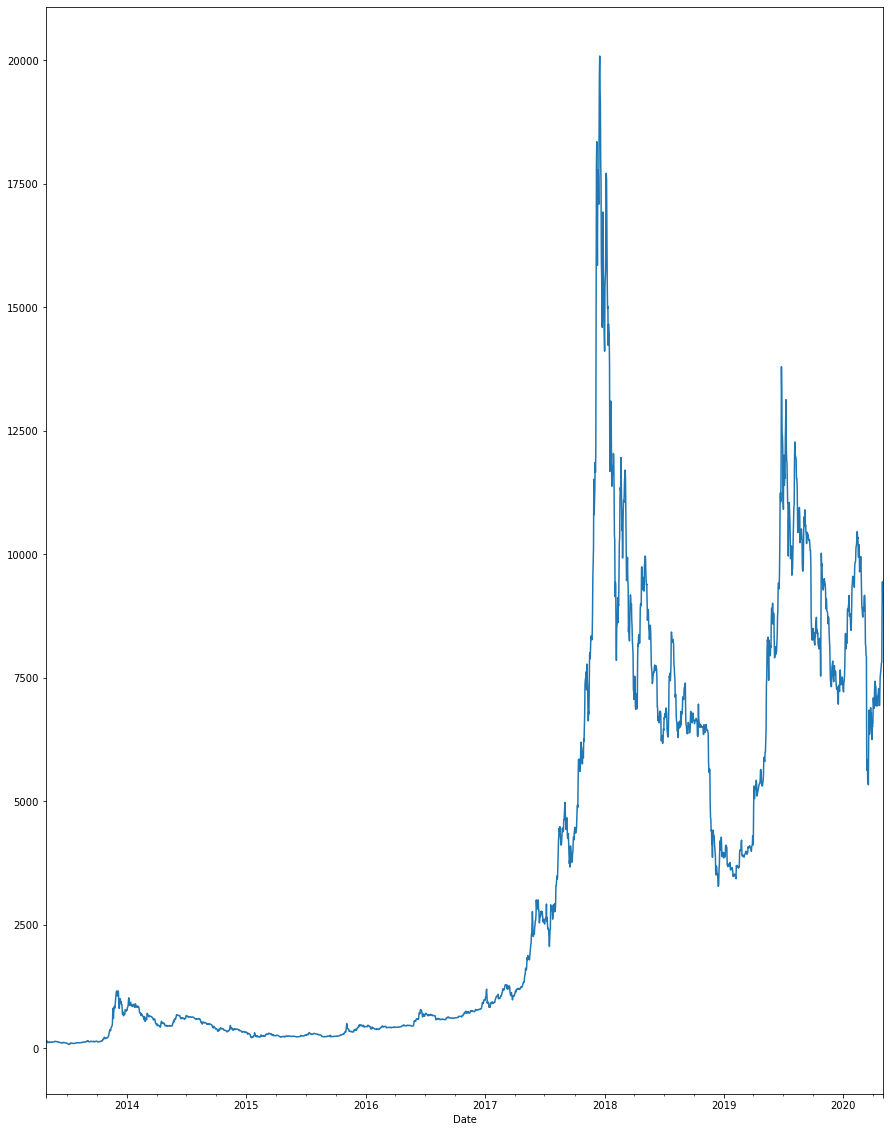

In [7]:
df["High"].plot(figsize=(15,20))

In [55]:
def scrape_businessinsider_usd_history(start_date, end_date):
    sy, sm, sd = int(start_date[0:4]), int(start_date[4:6]), int(start_date[6:8])
    ey, em, ed = int(end_date[0:4]), int(end_date[4:6]), int(end_date[6:8])
    url = f"https://markets.businessinsider.com/index/historical-prices/us-dollar-index/{sd}.{sm}.{sy}_{ed}.{em}.{ey}"
    return requests.get(url).text

In [56]:
html = scrape_businessinsider_usd_history('20130428', '20200503')

In [22]:

rcParams['figure.figsize'] = 18, 8